In [1]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

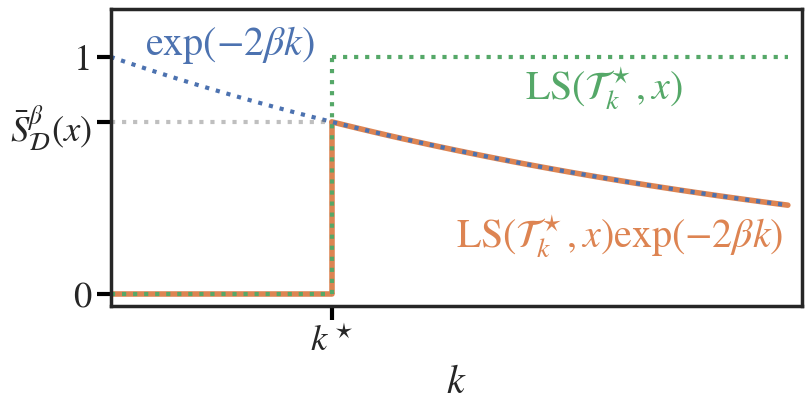

In [3]:
sns.set_theme(context="poster", style="white", font_scale=1.2)
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["font.family"] = "STIXGeneral"

fig, axs = plt.subplots(1, 1, figsize=(8, 4), layout="constrained")

ks = np.arange(0, 50)

beta = 0.01
k_star = 16

color = sns.color_palette("deep")[1]
axs.plot(ks[k_star:], np.exp(-2 * beta * ks[k_star:]), lw=4, color=color)
axs.vlines(k_star, ymin=0, ymax=np.exp(-2 * beta * k_star), lw=4, color=color)
axs.plot(
    ks[: k_star + 1],
    np.zeros_like(ks[: k_star + 1]),
    lw=4,
    color=color,
    label=r"$\text{LS}(\mathcal{T}^\star_{k}, x)\exp(-2\beta k)$",
)
axs.text(
    0.5,
    0.20,
    r"$\text{LS}(\mathcal{T}^\star_{k}, x)\exp(-2\beta k)$",
    fontsize="medium",
    color=color,
    transform=axs.transAxes,
)
axs.set_xlabel(r"$k$")

color = sns.color_palette("deep")[2]
axs.vlines(k_star, ymin=0, ymax=1, color=color, linestyle=":", label=r"$\text{LS}(\mathcal{T}^\star_{k}, x)$")
axs.plot(ks[k_star:], np.ones_like(ks[k_star:]), color=color, linestyle=":")
axs.plot(ks[: k_star + 1], np.zeros_like(ks[: k_star + 1]), color=color, linestyle=":")
axs.text(0.6, 0.7, r"$\text{LS}(\mathcal{T}^\star_{k}, x)$", fontsize="medium", color=color, transform=axs.transAxes)

color = sns.color_palette("deep")[0]
axs.plot(ks, np.exp(-2 * beta * ks), color=color, linestyle=":", label=r"$\exp(-2\beta k)$")
axs.text(0.05, 0.85, r"$\exp(-2\beta k)$", fontsize="medium", color=color, transform=axs.transAxes)

axs.set_xticks([k_star])
axs.set_xticklabels([r"$k^\star$"])
axs.hlines(np.exp(-2 * beta * k_star), xmin=0, xmax=k_star, color="grey", linestyle=":", alpha=0.5)
axs.tick_params("both", length=10, width=3, color="black", reset=True, top=False, right=False)
axs.set_ylim(-0.05, 1.2)
axs.set_xlim(0, 50)
axs.set_yticks([0, np.exp(-2 * beta * k_star), 1])
axs.set_yticklabels([0, r"$\bar{S}^{\beta}_{\mathcal{D}}(x)$", 1])
plt.savefig(".figures/smooth_sens_1.pdf", bbox_inches="tight", dpi=300)